In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/wine.csv')

# Выведем на экран первые 5 строк, чтобы обращаться к ним 
#  в дальнейшем /

display(df.head())

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<Axes: >

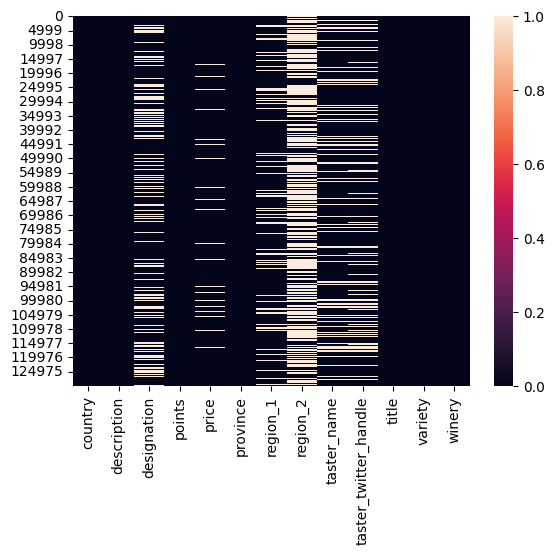

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/wine.csv')

sns.heatmap(df.isnull())

C:\Users\nitys\AppData\Local\Temp\ipykernel_2628\2881924593.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upd_df[mask_tester_twitter_isnot][mask_tester_isnot].shape[0]
C:\Users\nitys\AppData\Local\Temp\ipykernel_2628\2881924593.py:157: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upd_df[mask_tester_is][mask_tester_twitter_isnot]['taster_name'].apply(
C:\Users\nitys\AppData\Local\Temp\ipykernel_2628\2881924593.py:161: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upd_df[mask_tester_is][mask_tester_twitter_is]['taster_name'].apply(
C:\Users\nitys\AppData\Local\Temp\ipykernel_2628\2881924593.py:269: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upd_df[


Series([], dtype: float64)

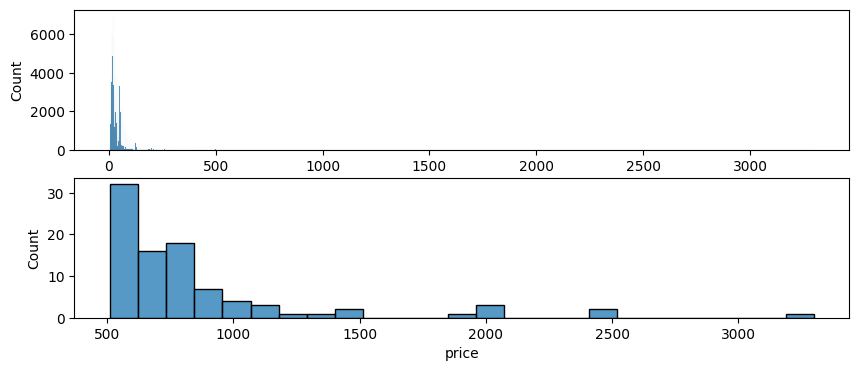

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/wine.csv')

# Произведем анализ пустых значений признаков в процентом выражении /

cols_null_percent = df.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

# Выведем на экран данные по пустым значениям 
# и закомментим, чтобы не делать в дальнейшем 
# лишних вычислений и сохраним исходные данные в CSV / 

# display(cols_with_null)
# cols_with_null.to_csv('wine_data/cols_with_null_orig.csv')

# region_2                 61.136715
# designation              28.825661
# taster_twitter_handle    24.015357
# taster_name              20.192197
# region_1                 16.347493
# price                     6.921544
# country                   0.048472
# province                  0.048472
# variety                   0.000769
# dtype: float64

##
#### Очистка данных
##

# Произведем удаление признаков с пропусками в более 30 
# процентах случаев /

thresh = df.shape[0]*0.7

df = df.dropna(thresh=thresh, axis = 1)


# Обратимся к еще одному признаку с пропусками **VARIETY** /

df[df['variety'].isnull() == True]

# Получили еще одно значение, эти данные не представляют ценности, 
# и взять сорт винограда нам не откуда, удалим их, к тому же, в 
# этой строке хватает пропусков /

index_to_del = df[df['variety'].isnull() == True].index[0]

df = df.drop(index = index_to_del)


##
#### Заполнение данных 
##

# Обратим внимание на признак **REGION_1**. 
# Инфорнмация о регионе дублируется в названиие вина. 
# Соответственно, заполним эти значения признаков оттуда 
# Для этого напишем функции обработки и вычленения 
# названия региона из названия вина (**TITLE**)/

def reg_1_finder(df):

    if df['region_1'] is np.nan:
        
        title_str = df['title']
        
        # Здесь мы обходим вероятность того, что до названия региона 
        # встретятся еще какие-то данные в скобках, поэтому делаем 
        # поиск индекса с конца строки и вычитаем его из длины строки /
        
        last_ind_open = len(title_str) - title_str[::-1].find('(')
        last_ind_close = len(title_str) - title_str[::-1].find(')')
        region_str = title_str[last_ind_open:(last_ind_close-1)]
        
        return region_str
    
    else:
        return df['region_1']
 

# Применим функцию к нашему ДФ, задав новый признак региона 1, 
# в который зайдет либо значение со старого признака региона 1, 
# либо данные с названия вина 
# Работаем в новом ДФ/

upd_df = df.copy()

upd_df['region_1_new'] = upd_df.apply(lambda x: reg_1_finder(x), axis=1)
    
# upd_df.info()

# Мы видим, что все значения признака теперь заполнены, 
# произведем небольшую проверку: выгрузим серии в множества 
# и произведем проверку на не вхождение, таким образом, 
# мы получим множество регионов, которые добавили путем применения 
# функции к исходному ДФ. Путем ручного выборочного поиска мы можем
# проверить в поисковиках, что это действительно регионы виноделия /

set_reg_1 = set(df['region_1'])
set_reg_1_new = set(upd_df['region_1_new'])
diff_set = set_reg_1_new.difference(set_reg_1)

# print(diff_set)

# Удалим уже ненужный признак /

upd_df = upd_df.drop('region_1', axis=1)


# Произведем работу с признаком **TASTER_TWITTER_HANDLE** и **TASTER_NAME**
# Создадим маски заполненности признаков имени сомелье и его 
# твиттера с припискам is - имеется, isnot - отсутствует /

mask_tester_is = upd_df['taster_name'].isnull() == False
mask_tester_isnot = upd_df['taster_name'].isnull() == True

mask_tester_twitter_is = upd_df['taster_twitter_handle'].isnull() == False
mask_tester_twitter_isnot = upd_df['taster_twitter_handle'].isnull() == True

# Произведем проверки количесва не указанных твиттеров, кол-ва 
#  неуказанных имен сомелье, и количества неуказанных И твиттеров, И имен
#  Из полученного видим, что кол-во неуказанных имен совпадает с количеством 
#  неуказанных и имен, и твиттеров, вероятно, это одни и те же строки 
#  Поэтому, дальнейший вопрос стоит сможем ли мы заполнить значения твиттера, 
#  опираясь на имя сомелье в кол-ве значений признаков 31 213 - 26 244 = 4 969/

upd_df[mask_tester_twitter_isnot].shape[0]
# 31213

upd_df[mask_tester_isnot].shape[0]
# 26244

upd_df[mask_tester_twitter_isnot][mask_tester_isnot].shape[0]
# 26244 


# Создадим множества 
# name_set_no_twitt - имена сомелье, у которых 
# не заполнено значение твиттера, 
# name_set_filled_twitt - имена сомелье, у которых 
# заполнено значение твиттера 
# Прозведем проверку на пересечение этих множеств 
# ЦЕЛЬ - изучить, возможно, у каких-то сомелье, у которых заполнено 
# значение имени, твиттер все-таки встречается хоть раз, и просто 
# не заполнен по ошибке 
# РЕЗУЛЬТАТ - таких случаев нет, твиттер мы не заполним корректными 
# данными /

name_set_no_twitt = set()  
name_set_filled_twitt = set() 

upd_df[mask_tester_is][mask_tester_twitter_isnot]['taster_name'].apply(
    lambda x: name_set_no_twitt.add(x)
    )

upd_df[mask_tester_is][mask_tester_twitter_is]['taster_name'].apply(
    lambda x: name_set_filled_twitt.add(x)
    )



taster_missed_twitt = name_set_no_twitt.intersection(name_set_filled_twitt)
# print(taster_missed_twitt)
# # set()

# Так же, проверим, возможно, у кого-то, у кого не заполнено 
# значение признака имени, заполнен твиттер, и далее мы сможем 
# сделать обратную проверки выше операцию 
# РЕЗУЛЬТАТ - нет, таких случаев не выявлено 
# ВЫВОД: можно однозначно сказать, что пропущенные значения 
# taster_name и taster_twitter_handle мы не сможем заполнить реальными 
# данными /

# print(upd_df[mask_tester_isnot][mask_tester_twitter_is].shape[0])
# # 0


# Т.к. заполнить пропуски реальными данными мы не можем, а избавляться 
# от признака имени сомелье мы не можем, признак имени мы заполним 
# значение unknow 
# Признак твиттера большой смысловой нагрузки на зависимости не несет,
# но, наличие ведения социальных сетей сомелье, возможно нам пригодится, 
# поэтому, заменим этот признак на 1 - если твиттер есть, 0 - если нет /


upd_df['taster_name'] = upd_df['taster_name'].fillna('unknown') 

upd_df['taster_twitter_handle'] = upd_df['taster_twitter_handle'].apply(
    lambda x: 1 if x is not np.nan else 0
    ) 
upd_df['taster_twitter_handle'] = upd_df['taster_twitter_handle'].astype('category')


# Признак **DESIGNATION** - величина пропусков составляет 28.8 % 
# С одной стороны у нас уже есть признак региона, с другой стороны 
# бренд винодельни может оказывать решающее значение на цену. 
# Стоит отметь, что в названии вина содержится информация о винодельне, 
# но вычлинить ее оттуда проблемтично ввидно отсутствия структурированности 
# наименований. Заполним пропуски признака значениями UNKNOW /

upd_df['designation'] = upd_df['designation'].fillna('unknown') 



# Займемся пропусками категорий **COUNTRY** и **PROVINCE** 
# Мы видим, что кол-во пропусков в данных признаках одинаково. 
# Хоть, значение пропусков и незначительно, заполнить мы их сможем, т.к. 
# если взять гепотезу о том, что климатические условия влияют на качество 
# урожая, и на цену, то для нас это важно. 
# Заполнять будем в полу-ручном режиме, опираясь на значение признака winery / 

winery_no_country_set = set()

def winery_no_country_set_filling(df):
    if df['country'] is np.nan:
        winery_no_country_set.add(df['winery'])
        
upd_df.apply(lambda x: winery_no_country_set_filling(x), axis=1)

len(winery_no_country_set)
# Получили, что количество виноделен, в которых не указана страна и провинция 
# Составляет всего 27 шт. Мы можем воспользоваться поиском, и заполнить вручную 
# Так же, преобразуем полученное множество в словарь, где ключ - винодельня, 
# значение - список из двух элементов - страна, провинция /

winery_no_country_dict = dict.fromkeys(winery_no_country_set, [None, None])
winery_no_country_dict['Psagot'] = ['Israel', 'Jerusalem']
winery_no_country_dict['Bachelder'] = ['Canada', 'Beamsville']
winery_no_country_dict['Ktima Voyatzi'] = ['Greece', 'Velventos']
winery_no_country_dict['Santa Ema'] = ['Chile', 'Santiago']
winery_no_country_dict['Tsililis'] = ['Greece', 'Meteora']
winery_no_country_dict['El Capricho'] = ['Uruguay', 'Departamento de Durazno']
winery_no_country_dict['Newton Johnson'] = ['South Africa', 'Hermanus']
winery_no_country_dict['Kakhetia Traditional Winemaking'] = ['Georgia', 'Kakheti']
winery_no_country_dict['Gotsa Family Wines'] = ['Georgia', 'Kiketi']
winery_no_country_dict['Les Frères Dutruy'] = ['Switzerland', 'Founex']
winery_no_country_dict['Bartho Eksteen'] = ['South Africa', 'Hermanus']
winery_no_country_dict['Neumeister'] = ['Austria', 'Straden']
winery_no_country_dict['Chilcas'] = ['Chile', 'Región Metropolitana']
winery_no_country_dict['Büyülübağ'] = ['Turkey', 'Kadikoy']
winery_no_country_dict['Amiran Vepkhvadze'] = ['Georgia', 'Zestafoni']
winery_no_country_dict['Mt. Beautiful'] = ['US', 'Benicia']
winery_no_country_dict['Somlói Vándor'] = ['Hungary', 'Somlovasarhely']
winery_no_country_dict['Lismore'] = ['South Africa', 'Greyton']
winery_no_country_dict['Orbelus'] = ['Bulgaria', 'Kromidovo']
winery_no_country_dict['Stone Castle'] = ['Kosovo', 'Rahovec']
winery_no_country_dict['Undurraga'] = ['Chile', 'Talagante']
winery_no_country_dict['Teliani Valley'] = ['Georgia', 'Telavi']
winery_no_country_dict['Familia Deicas'] = ['Uruguay', 'Departamento de Canelones']
winery_no_country_dict['St. Donat'] = ['Hungary', 'Csopak']
winery_no_country_dict['Logodaj'] = ['Bulgaria', 'Logodazh']
winery_no_country_dict['Ross-idi'] = ['Bulgaria', 'Nikolaevo']
winery_no_country_dict['Barton & Guestier'] = ['France', 'Blanquefort']


# Итак, мы создали словарь, в котором имеются данные для заполнения 
# значений признаков страны и провинции. Произведем заполнение в ДФ /


# Убедимсся, что те строки, в которых пропущено значение страны 
# являются теми же строками, в которых пропущено значение провинции,
# для того, чтобы фильтроваться по одному признаку /
upd_df[upd_df['country'].isnull() == True].shape[0] == \
    upd_df[
        upd_df['country'].isnull() == True][
            upd_df['province'].isnull() == True].shape[0]
# True

def country_prov_filling(upd_df):
    if upd_df['country'] is np.nan:
        upd_df['country'] = winery_no_country_dict[upd_df['winery']][0]
        upd_df['province'] = winery_no_country_dict[upd_df['winery']][1]
    return upd_df    

upd_df = upd_df.apply(lambda x: country_prov_filling(x), axis=1)





# Займемся заполенением признака цены. Для начала, изучим его, 
# простроив две гистограммы, с ценой без фильтра и с фильтром > 500 /

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,4))
price_all = sns.histplot(
    data = upd_df,
    x = 'price',
    ax=axes[0]
)
price_more_500 = sns.histplot(
    data = upd_df[upd_df['price'] > 500],
    x = 'price',
    ax=axes[1]
)

# Наблюдаем распределение, похожее на лог-нормальное, 
# где пик около нуля, соответственно, будем иметь много выбросов, 
# что так же, видим, по второй диаграмме ("убеждаемся") 
# Следовательно, пропущенные значения признака будем заполнять 
# медианными значениями /

upd_df['price'] = upd_df['price'].fillna(upd_df['price'].median())



# Мы завершили работу с очисткой и заполнением данных 
# Произведем проверку на наличие пустых значений признаков /

cols_null_percent_upd = upd_df.isnull().mean()*100

cols_with_null_upd = cols_null_percent_upd[
    cols_null_percent_upd>0
    ].sort_values(ascending=False)

display(cols_with_null_upd)
# Series([], dtype: float64)



# Готово, наш ДФ очищен и заполнен, 
# Теперь, удалим дубликаты и произведем его сохранение /

upd_df = upd_df.drop_duplicates()

upd_df.to_csv('wine_data/wine_cleared.csv', index=False)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wine_df = pd.read_csv('wine_data/wine_cleared.csv')

wine_df[wine_df['region_1_new'] == np.nan]

,country,description,designation,points,price,province,taster_name,taster_twitter_handle,title,variety,winery,region_1_new
